# Classificação de bebês

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("sinasc_RO_2019.csv")
db = df.copy()

In [37]:
db.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [39]:
db.describe()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea
count,27028.0,2.691300e+04,27028.000000,27028.000000,27028.000000,26711.000000,24121.000000,25455.000000,24930.000000,27028.000000,...,27028.000000,27028.0,27028.000000,27028.000000,27028.000000,2.702800e+04,27027.000000,27027.000000,27027.000000,27027.000000
mean,1.0,3.267629e+06,111037.796211,1.011396,26.093718,2.545318,795604.031591,1.053899,0.266506,110029.055720,...,0.999778,1.0,4.328437,0.648772,4.974952,7.367650e+05,-10.377988,-62.754987,179.111999,14702.799767
std,0.0,1.122677e+06,18102.751466,0.161679,6.387094,1.671248,283884.959287,1.170874,0.613909,36.036466,...,0.014898,0.0,2.930690,0.477363,2.067085,7.430325e+05,1.372942,1.269490,123.138365,13706.177751
min,1.0,1.531800e+04,110001.000000,1.000000,11.000000,1.000000,10205.000000,0.000000,0.000000,110000.000000,...,0.000000,1.0,1.000000,0.000000,1.000000,1.000000e+00,-13.499760,-65.329150,85.000000,459.978000
25%,1.0,2.496534e+06,110011.000000,1.000000,21.000000,1.000000,521125.000000,0.000000,0.000000,110012.000000,...,1.000000,1.0,2.000000,0.000000,4.000000,6.802750e+03,-11.433870,-63.831450,87.000000,3792.998000
50%,1.0,2.798484e+06,110020.000000,1.000000,26.000000,2.000000,999992.000000,1.000000,0.000000,110020.000000,...,1.000000,1.0,4.000000,1.000000,5.000000,1.364550e+04,-10.435950,-63.033270,153.000000,6896.648000
75%,1.0,3.970442e+06,110020.000000,1.000000,31.000000,5.000000,999992.000000,2.000000,0.000000,110028.000000,...,1.000000,1.0,5.000000,1.000000,5.000000,1.486846e+06,-8.768890,-61.945090,191.000000,34096.394000
max,1.0,9.659366e+06,520870.000000,4.000000,53.000000,9.000000,999994.000000,30.000000,28.000000,110180.000000,...,1.000000,1.0,11.000000,1.000000,9.000000,2.780269e+06,-8.768890,-60.138580,595.000000,34096.394000


In [64]:
db.shape

(27028, 70)

In [70]:
db.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'CatAPG5'],
    

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [48]:
db.loc[db['APGAR5'] < 3, 'CatAPG5'] = 'asfixia grave'
db.loc[(db['APGAR5'] > 3) & (db['APGAR5'] < 5), 'CatAPG5'] = 'asfixia moderada'
db.loc[(db['APGAR5'] > 6) & (db['APGAR5'] < 7), 'CatAPG5'] = 'asfixia leve'
db.loc[db['APGAR5'] > 8, 'CatAPG5'] = 'normal'

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

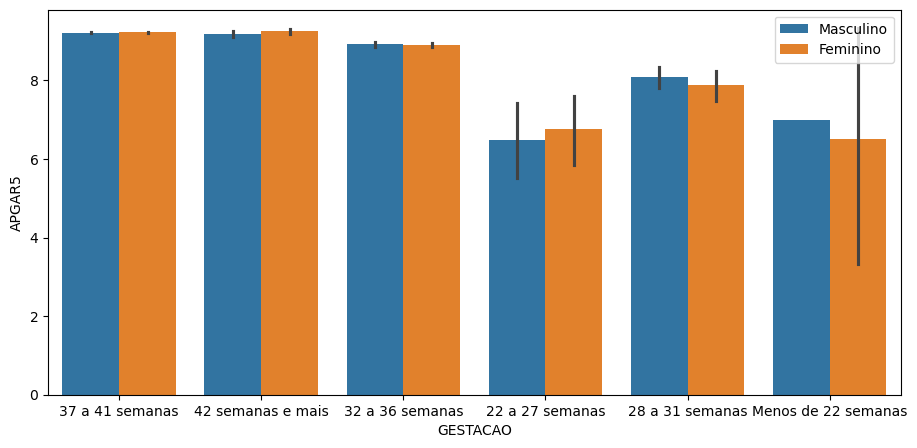

In [253]:
fig, axes = plt.subplots(1, 1, figsize = (11, 5))
sns.barplot(ax = axes, x= 'GESTACAO', y= 'APGAR5', data= db, hue= 'SEXO')
plt.legend(loc='best')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [167]:
fq = pd.crosstab(db['APGAR5'], db['GESTACAO'])

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [204]:
div_fq = fq.div(fq.sum(axis=1), axis=0) * 100
div_fq = div_fq.round(2)
div_fq

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,43.75,0.00,12.50,31.25,6.25,6.25
1.0,0.00,0.00,9.09,90.91,0.00,0.00
2.0,50.00,12.50,12.50,18.75,0.00,6.25
3.0,42.86,7.14,14.29,35.71,0.00,0.00
4.0,4.76,23.81,38.10,33.33,0.00,0.00
5.0,0.00,17.50,27.50,52.50,2.50,0.00
6.0,2.78,9.72,23.61,62.50,1.39,0.00
7.0,4.27,4.70,23.93,64.53,2.14,0.43
8.0,1.26,3.20,18.97,74.27,2.31,0.00


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='APGAR5'>

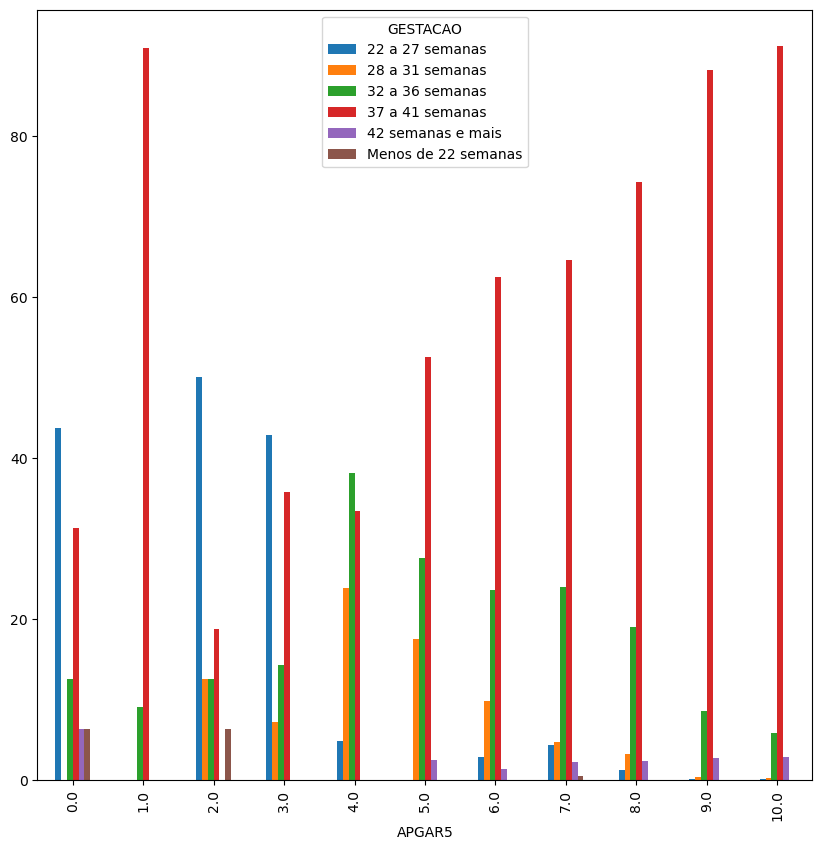

In [207]:
div_fq.plot.bar()

No geral, sim. bebes com até 36 semanas em geral possuem um APGAR5 igual ou inferior a 4

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

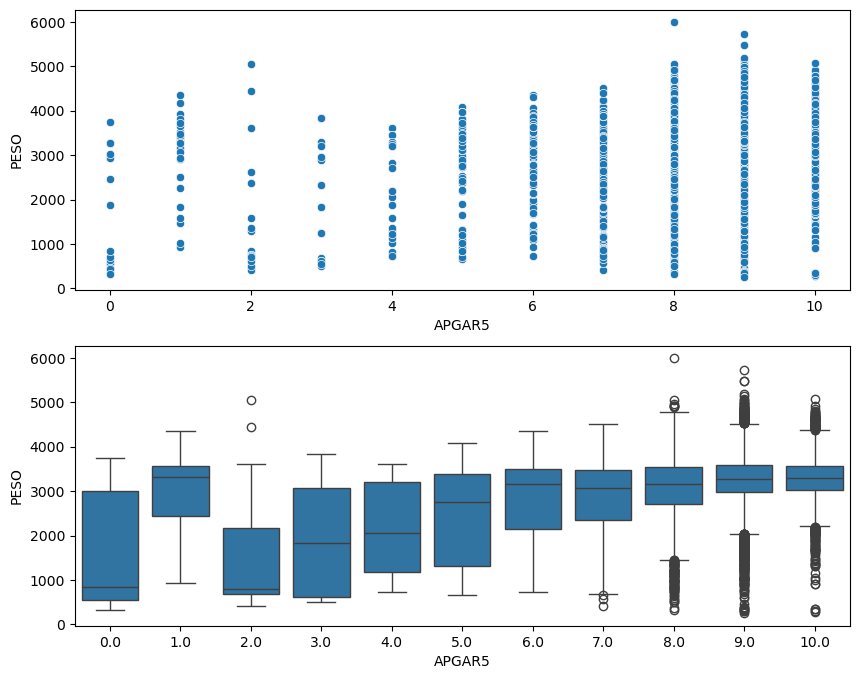

In [275]:
fig, axes = plt.subplots(2, 1, figsize=(10,8))
sns.scatterplot(ax = axes[0], x='APGAR5', y='PESO', data= db )
sns.boxplot(ax = axes[1], x='APGAR5', y='PESO', data= db )

## conlusão:
A relação não é perfeita, nem sempre o peso tem relação, entretanto, percebemos que bebes com varoles mais altos de APGAR5 tendem a ter o peso mais balanceado, em geral mais alto, enquanto os bebes com os menores valores de APGAR5 tem os menores pesos.